In [1]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:

# re-size all the images to this
IMAGE_SIZE = [256,256]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(18, activation='softmax')(x)


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [3]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_dir="/content/drive/MyDrive/FYP2Dataset/"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

test_set = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1186 images belonging to 18 classes.
Found 295 images belonging to 18 classes.


In [7]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
149/149 [==============================] - 1175s 8s/step - loss: 1.6379 - accuracy: 0.6298 - val_loss: 0.5097 - val_accuracy: 0.8475
Epoch 2/15
149/149 [==============================] - 34s 226ms/step - loss: 0.2984 - accuracy: 0.9056 - val_loss: 1.0078 - val_accuracy: 0.7627
Epoch 3/15
149/149 [==============================] - 34s 231ms/step - loss: 0.2093 - accuracy: 0.9317 - val_loss: 0.8056 - val_accuracy: 0.8000
Epoch 4/15
149/149 [==============================] - 35s 234ms/step - loss: 0.1866 - accuracy: 0.9435 - val_loss: 0.9845 - val_accuracy: 0.8203
Epoch 5/15
149/149 [==============================] - 34s 230ms/step - loss: 0.2250 - accuracy: 0.9376 - val_loss: 0.7219 - val_accuracy: 0.8508
Epoch 6/15
149/149 [==============================] - 34s 231ms/step - loss: 0.3180 - accuracy: 0.9165 - val_loss: 0.8023 - val_accuracy: 0.8508
Epoch 7/15
149/149 [==============================] - 35s 237ms/step - loss: 0.1165 - accuracy: 0.9671 - val_loss: 0.5834 - val_acc

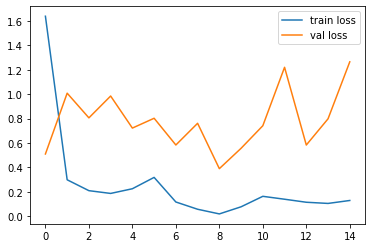

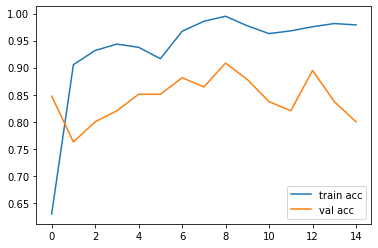

In [9]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:




# train_path = 'Datasets/Train'
# valid_path = 'Datasets/Test'

  
#   # useful for getting number of classes
# folders = glob('Datasets/Train/*')
  


# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('Datasets/Train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('Datasets/Test',
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

# '''r=model.fit_generator(training_set,
#                          samples_per_epoch = 8000,
#                          nb_epoch = 5,
#                          validation_data = test_set,
#                          nb_val_samples = 2000)'''

# # fit the model
# r = model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=5,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )
# # loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # accuracies
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

# import tensorflow as tf

# from keras.models import load_model

# model.save('facefeatures_new_model.h5')